In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.ndimage as scpimg
import skimage.feature


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)   
plt.rc('ytick', labelsize=SMALL_SIZE)

In [13]:
f = h5py.File('C:/Users/Jose peñaranda/Documents/Documentos_python/env/archivos/Catalogo/campos_gaussianos/divergencia_watershed/mock_divergence_mesh_360_box_720_slim_6.h5', 'r')
divergence_field = f['divergence'][...]
f.close()


#f = h5py.File('C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/campos_gaussianos/divergencia_watershed/mock_watershed_mesh_360_box_720_slim_10.h5', 'r')
#watershed_field = f['watershed_group'][...]
#f.close()

In [14]:
slice_id = 150
divergence_slice = divergence_field[:,slice_id,:]
#watershed_slice = watershed_field[:,slice_id,:]

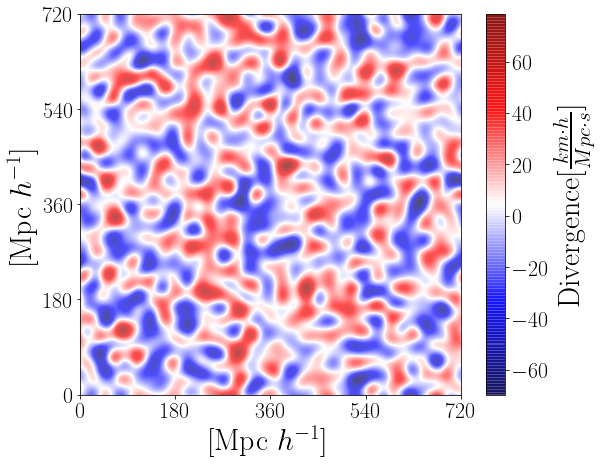

In [15]:
plt.figure(figsize=(9,7))

#result = scpimg.sobel(np.sin(watershed_slice)/0.5)
#result[result!=0] = -1
#sx = scpimg.sobel(watershed_slice, axis=0, mode='wrap')
#sy = scpimg.sobel(watershed_slice, axis=1, mode='wrap')
#sob = np.hypot(sx, sy)
#sob[sob!=0] = -1

#plt.imshow(sob, cmap=plt.cm.gray, 
#          extent=[0,720,0,720])

factor = 1
plt.imshow(divergence_slice/factor, 
           extent=[0,720,0,720], cmap='seismic', alpha=0.7)

plt.colorbar(label=r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')
plt.xlabel("[Mpc $h^{-1}$]")
plt.ylabel("[Mpc $h^{-1}$]")
plt.xticks(np.linspace(0,720,5))
plt.yticks(np.linspace(0,720,5))
plt.savefig("example_divergence_6.pdf", bbox_inches='tight')

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [17]:
archivos = [0]
vmax = [125,180,300]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/misma_cosmologia/Simulacion{}/fields/watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_{}.0_sigma_3.0_nside_360.hdf5'

grupos = []

for i in archivos:
    for j in vmax:
        with h5py.File(filename.format(i,j), 'r') as f:
            print(f.keys())
            watershed_groups_key = list(f.keys())[0]
            watershed_groups = np.array(f[watershed_groups_key])
        
        grupos.append(watershed_groups)
    

<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>


In [13]:
vmax = [125]
archivos = [2]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/misma_cosmologia/Simulacion{}/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_{}.0_sigma_3.0_nside_360.hdf5'
divergencias = []

aleatorio = np.random.randint(0,360)
for i in archivos:
    for j in vmax:
        with h5py.File(filename.format(i,j), 'r') as f:
            print(f.keys())
            divergence = list(f.keys())[0]
            dataDivergence = np.array(f[divergence])
        
        divergencias.append(dataDivergence)
    

<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>


In [15]:
aleatorio = 25

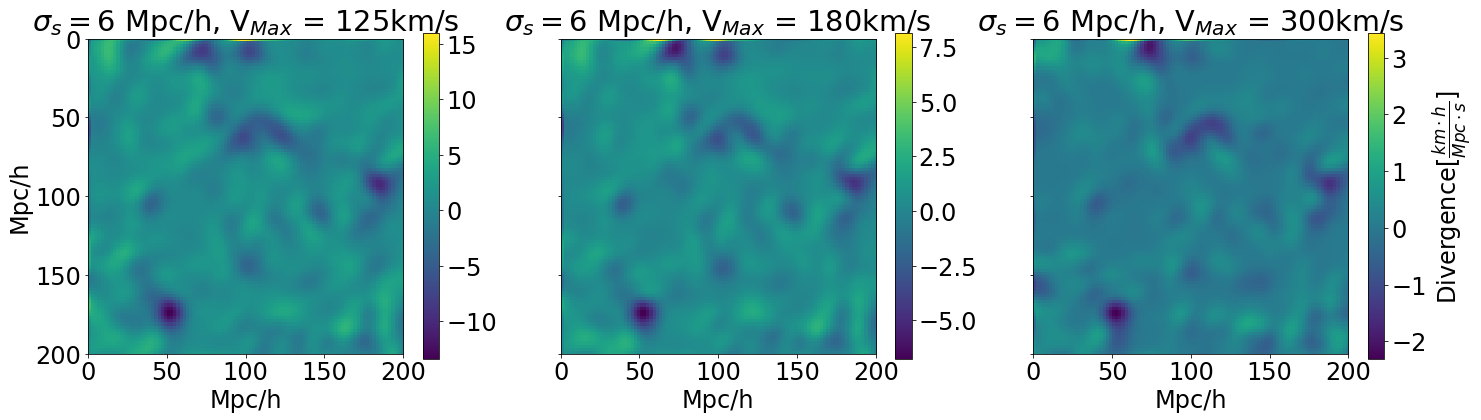

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

plt.rcParams.update({'font.size': 24})

im = axs[0].imshow(divergencias[0][aleatorio][:100,:100],extent=[0,200,200,0])
axs[0].set_xlabel('Mpc/h',fontsize = 24)
axs[0].set_ylabel('Mpc/h',fontsize = 24)
plt.rcParams.update({'font.size': 24})
axs[0].set_title('$\sigma_s = 6$ Mpc/h, V$_{{Max}}$ = {}km/s'.format(125))
plt.rcParams.update({'font.size': 24})
fig.colorbar(im, ax = axs[0])

im = axs[1].imshow(divergencias[1][aleatorio][:100,:100],extent=[0,200,200,0])
axs[1].set_xlabel('Mpc/h',fontsize = 24)
plt.rcParams.update({'font.size': 24})
axs[1].set_title('$\sigma_s = 6$ Mpc/h, V$_{{Max}}$ = {}km/s'.format(180))
plt.rcParams.update({'font.size': 24})
fig.colorbar(im, ax = axs[1])

im = axs[2].imshow(divergencias[2][aleatorio][:100,:100],extent=[0,200,200,0])
axs[2].set_xlabel('Mpc/h',fontsize = 24)
plt.rcParams.update({'font.size': 24})
axs[2].set_title('$\sigma_s = 6$ Mpc/h, V$_{{Max}}$ = {}km/s'.format(300))
plt.rcParams.update({'font.size': 24})
fig.colorbar(im, ax = axs[2],label = r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')



plt.savefig('watershed_sigma_06_vmax_{}.png'.format('x'))

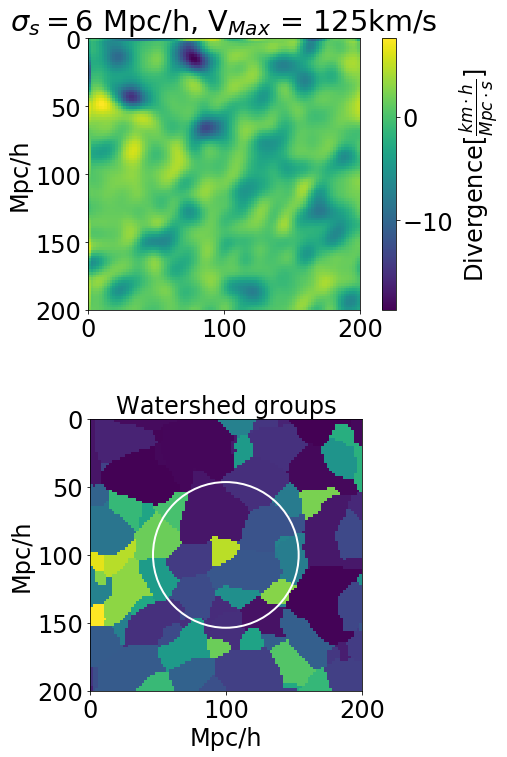

In [16]:
sigma_vox = 0
ws = grupos[sigma_vox][aleatorio][:100,:100]
divergence = divergencias[sigma_vox][aleatorio][:100,:100]


fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharey=True)

plt.rcParams.update({'font.size': 24})

im = axs[0].imshow(divergence,extent=[0,200,200,0])
axs[0].set_ylabel('Mpc/h',fontsize = 24)
plt.rcParams.update({'font.size': 24})
axs[0].set_title('$\sigma_s = 6$ Mpc/h, V$_{{Max}}$ = {}km/s'.format(vmax[0]))
plt.rcParams.update({'font.size': 24})
a_circle = plt.Circle((150,150),53.6, color = 'white',fill = False, lw = 2)
fig.colorbar(im, ax = axs[0],label = r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')


axs[1].imshow(ws,extent=[0,200,200,0])
axs[1].set_xlabel('Mpc/h',fontsize = 24)
axs[1].set_ylabel('Mpc/h',fontsize = 24)
axs[1].set_title('Watershed groups',fontsize = 24)
b_circle = plt.Circle((100,100),53.6, color = 'white',fill = False, lw = 2)
axs[1].add_artist(b_circle)
fig.subplots_adjust(hspace=0.4, wspace=0.4)



plt.savefig('watershed_sigma_06_vmax_{}.png'.format(vmax[0]))

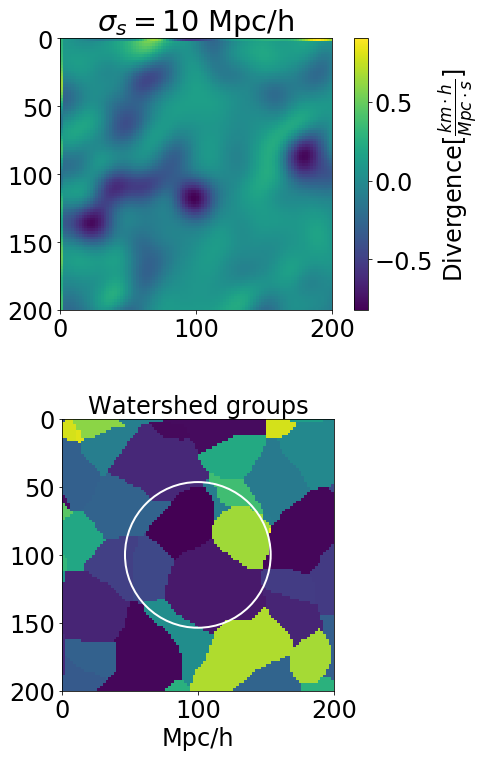

In [10]:
sigma_vox = 2
ws = grupos[sigma_vox][aleatorio][:100,:100]
divergence = divergencias[sigma_vox][aleatorio][:100,:100]

fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharey=True)

plt.rcParams.update({'font.size': 24})

im = axs[0].imshow(divergence,extent=[0,200,200,0])
axs[0].set_title('$\sigma_s = 10$ Mpc/h')
a_circle = plt.Circle((150,150),53.6, color = 'white',fill = False, lw = 2)
fig.colorbar(im, ax = axs[0],label = r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')


axs[1].imshow(ws,extent=[0,200,200,0])
axs[1].set_xlabel('Mpc/h',fontsize = 24)
axs[1].set_title('Watershed groups',fontsize = 24)
b_circle = plt.Circle((100,100),53.6, color = 'white',fill = False, lw = 2)
axs[1].add_artist(b_circle)
fig.subplots_adjust(hspace=0.4, wspace=0.4)



plt.savefig('smooth_watershed_05.png')

In [18]:
group_num = []
for i in grupos:
    group_num.append(len(list(set(i.flatten()))))
    
#archivos = np.array([1,3,5,7,10])*2

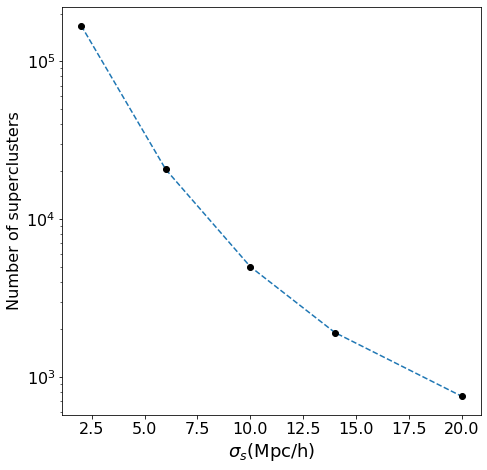

In [13]:
plt.figure(figsize = (7.5,7.5))
plt.rcParams.update({'font.size': 16})
plt.semilogy(archivos,group_num, '--')
plt.semilogy(archivos,group_num,'o', c = 'black')
plt.xlabel("$\sigma_{s}$(Mpc/h)", fontsize = 18)
plt.ylabel("Number of superclusters", fontsize = 16)
plt.savefig('num_superclusters.png')